# 추세 추정

확률 과정의 기댓값이 시간에 대한 함수로 표현될 수 있을 때 추세(trend)를 가진다고 한다. **추세 추정(trend estimation)**은 것은 이 기댓값 함수의 형태를 알아내는 것을 말한다. 

추세에 대한 소개는 다음 노트북을 참조한다.

[[school_notebook:0ddd47967585403ab8b4cb60d0e420f6]]

추세를 가진다는 것은 결국 확률 과정이 정상 과정(stationary process)이 아니라 비정상 과정(non-stationary process)임을 뜻한다. 그러나 분석을 쉽게 하기 위해 보통 다음과 같은 가정을 한다.

* 우리가 분석하고자하는 확률 과정 $Y_t$이 일반적인 비정상 과정이 아니라 추정이 가능한 **결정론적 추세 함수 $f(t)$와 확률 정상 과정 $X_t$의 합**으로 표현될 수 있다. 

$$ Y_t \sim f(t) + X_t $$


계절성도 추세에 포함 된다고 볼 수 있다.

* 다항식 추세 (polynomial trend)
* 계절성 추세 (seasonality)

## 다항식 추세

다항식 추세 분석 방법은 추세 함수 즉, 확률 과정의 기댓값을 시간에 대한 다항식으로 나타낼 수 있다고 가정하는 것이다.

$$ f(t) = \sum_{i=0}^M a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots $$

가장 단순한 모형으로 선형 추세를 가지는 경우를 살펴보자.

[Cryer & Chan (2008)](http://www.springer.com/us/book/9780387759586) 의 예제 자료 중 rwalk 자료의 선형 추세를 구해본다.

In [1]:
df = pd.read_csv("data/tsa/rwalk.dat")
df.reset_index(inplace=True)
df.columns = ['t', 'y']
df.head()

,t,y
0,0,-0.41433
1,1,-0.26562
2,2,-0.01265
3,3,-1.43122
4,4,-2.03763


pandas의 `read_csv` 명령으로 자료를 읽고 `reset_index` 메서드로 정수 인덱스를 열에 포함시킨다. 이렇게 하면 시간 인덱스를 `df['index']` 그리고 데이터 값을 `df['rwalk']`로 접근할 수 있다. 또 데이터 프레임의 원래 인덱스와 구별 할 수 있게 열 이름을 바꾼다. 

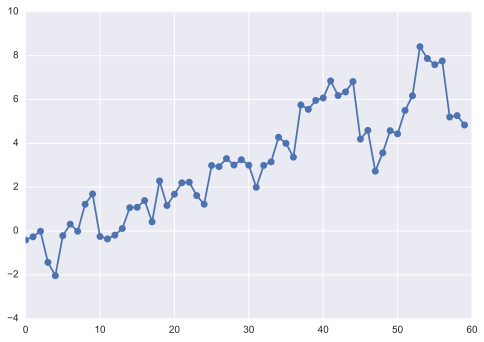

In [2]:
plt.plot(df.t, df.y, 'o-')

회귀 분석은 statsmodels의 `ols` 명령을 사용하고 그래프는 seaborn의 `regplot` 명령을 사용한다.

In [3]:
import statsmodels.formula.api as smf
results = smf.ols(formula='y ~ t', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     250.3
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           1.05e-22
Time:                        06:46:15   Log-Likelihood:                -91.816
No. Observations:                  60   AIC:                             187.6
Df Residuals:                      58   BIC:                             191.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.8738      0.290     -3.014      0.004        -1.454    -0.293
t              0.1341      0.008     15.822      0.000         0.117     0.151
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.743
Skew:                          -0.080   Prob(JB):                        0.690
Kurtosis:                       2.479   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 회귀 분석 결과 보고서에서 추세 함수가 다음과 같다는 것을 할 수 있다.

$$ f(t) = 0.1341 t - 0.8738 $$

이를 플롯으로 나타내면 아래와 같다.

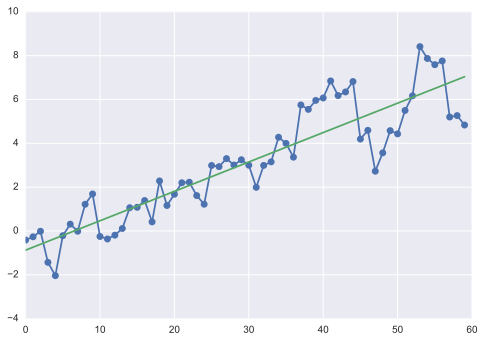

In [4]:
t = df.t
y = df.y
trend = results.params[0] + results.params[1] * t
plt.plot(t, y, 'o-', t, trend, '-');

만약 추세가 2차 함수 형태라면 다음과 같이 추세를 추정할 수 있다.

In [5]:
results = smf.ols(formula='y ~ t + I(t**2)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     127.0
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           1.00e-21
Time:                        06:46:15   Log-Likelihood:                -91.041
No. Observations:                  60   AIC:                             188.1
Df Residuals:                      57   BIC:                             194.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.2533      0.424     -2.954      0.005        -2.103    -0.404
t              0.1733      0.033      5.214      0.000         0.107     0.240
I(t ** 2)     -0.0007      0.001     -1.221      0.227        -0.002     0.000
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.977
Skew:                           0.044   Prob(JB):                        0.614
Kurtosis:                       2.381   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

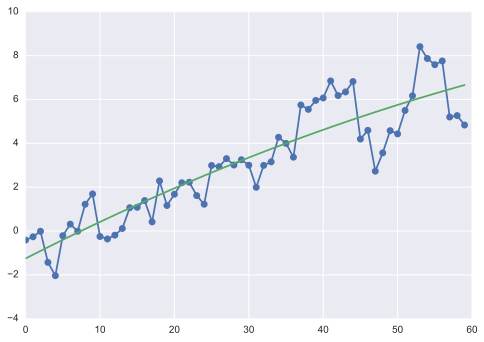

In [6]:
trend = results.params[0] + results.params[1] * t + results.params[2] * t**2
plt.plot(t, y, 'o-', t, trend, '-')

## 계절성 추세

계절성 추세는 특정한 달(month)이나 요일(day of week)에 따라 기댓값이 달라지는 것을 말한다. 이는 달 이름이나 요일 이름을 카테고리(category) 값으로 사용하여 회귀분석하여 추정할 수 있다.

[Cryer & Chan (2008)](http://www.springer.com/us/book/9780387759586) 의 예제 자료 중 기온 자료인 tempdub의 월별 계절성을 구해보자

In [7]:
df = pd.read_csv("data/tsa/tempdub.dat")
df.index = pd.date_range("1/1964", "12/1975", freq="MS")
df["month"] = df.index.month
df.head()

,tempdub,month
1964-01-01,24.7,1
1964-02-01,25.7,2
1964-03-01,30.6,3
1964-04-01,47.5,4
1964-05-01,62.9,5


In [8]:
import statsmodels.formula.api as smf
results = smf.ols(formula='tempdub ~ C(month) - 1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tempdub   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     405.1
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           6.04e-96
Time:                        06:46:15   Log-Likelihood:                -375.09
No. Observations:                 144   AIC:                             774.2
Df Residuals:                     132   BIC:                             809.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
C(month)[1]     16.6083      0.987     16.828      0.000        14.656    18.561
C(month)[2]     20.6500      0.987     20.923      0.000        18.698    22.602
C(month)[3]     32.4750      0.987     32.904      0.000        30.523    34.427
C(month)[4]     46.5250      0.987     47.140      0.000        44.573    48.477
C(month)[5]     58.0917      0.987     58.859      0.000        56.139    60.044
C(month)[6]     67.5000      0.987     68.392      0.000        65.548    69.452
C(month)[7]     71.7167      0.987     72.664      0.000        69.764    73.669
C(month)[8]     69.3333      0.987     70.249      0.000        67.381    71.286
C(month)[9]     61.0250      0.987     61.831      0.000        59.073    62.977
C(month)[10]    50.9750      0.987     51.648      0.000        49.023    52.927
C(month)[11]    36.6500      0.987     37.134      0.000        34.698    38.602
C(month)[12]    23.6417      0.987     23.954      0.000        21.689    25.594
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.674
Skew:                           0.098   Prob(JB):                        0.714
Kurtosis:                       3.272   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

모형식 문자열에서 "-1"은 y 절편을 모형에 넣지 않는 것을 의미한다. 즉, 모든 month변수의 가능한 값을 사용한다. month 변수가 0과 1값을 가지는 dummy 변수이기때문에 이 분석에서 구한 계수는 특정한 달의 기온 평균값이 된다. 

추정한 계절성 성분과 나머지 성분을 분리하여 그리면 다음과 같다.

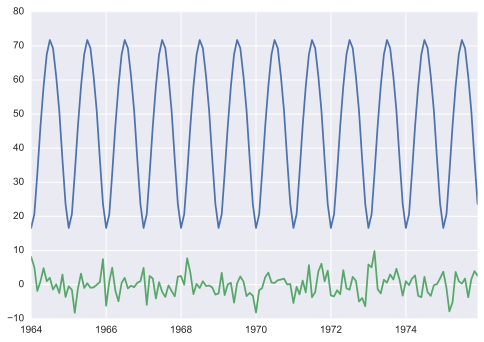

In [11]:
plt.plot(results.fittedvalues)
plt.plot(results.resid)